Importing libraries:

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

Ignoring warnings: (It's important to note that ignoring warnings may hide important information and should be used with caution. The warnings in this project is not relevant).

In [2]:
warnings.filterwarnings("ignore")

Reading the data into a pandas DataFrame:

In [3]:
data = pd.read_csv('openpowerlifting-2023-01-07-c2c53d7e.csv')

Checking the data:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836316 entries, 0 to 2836315
Data columns (total 41 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Name              object 
 1   Sex               object 
 2   Event             object 
 3   Equipment         object 
 4   Age               float64
 5   AgeClass          object 
 6   BirthYearClass    object 
 7   Division          object 
 8   BodyweightKg      float64
 9   WeightClassKg     object 
 10  Squat1Kg          float64
 11  Squat2Kg          float64
 12  Squat3Kg          float64
 13  Squat4Kg          float64
 14  Best3SquatKg      float64
 15  Bench1Kg          float64
 16  Bench2Kg          float64
 17  Bench3Kg          float64
 18  Bench4Kg          float64
 19  Best3BenchKg      float64
 20  Deadlift1Kg       float64
 21  Deadlift2Kg       float64
 22  Deadlift3Kg       float64
 23  Deadlift4Kg       float64
 24  Best3DeadliftKg   float64
 25  TotalKg           float64
 26  Place         

We are interested in finding the total for each competing powerlifter. 

The column TotalKg represents the total but this parameter is optional. (See the full documentation here: https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html). Therefore I calculate the total (Squat + Bench + Deadlift). Here I could use the columns Best3SquatKg, Best3BenchKg and Best3DeadliftKg but these are also optional. Therefore, I calculate the best lift in this manner: E.g. for squat: max(Squat1Kg, Squat2Kg Squat3Kg). (Squat4Kg is not used in SBD events). If value is neagtive, it means that the lift is failed. I exclude negative values for each lift.

In [5]:
data['Best_Squat'] = data[['Squat1Kg','Squat2Kg','Squat3Kg']].max(axis=1)
data['Best_Deadlift'] = data[['Deadlift1Kg','Deadlift2Kg','Deadlift3Kg']].max(axis=1)
data['Best_Bench'] = data[['Bench1Kg','Bench2Kg','Bench3Kg']].max(axis=1)
data = data[(data['Best_Squat'] > 0) & (data['Best_Deadlift'] > 0) & (data['Best_Bench'] > 0)]
data['Total'] = data['Best_Squat'] + data['Best_Deadlift'] + data['Best_Bench']

Choose data from only positive totals:

In [6]:
data = data[data['Total'] > 0]

Choose only SBD events:

In [7]:
data = data[data['Event'] == 'SBD']

Choose only male powerlifters:

In [8]:
data = data[data['Sex'] == 'M']

Adding a Year column:

In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

Choosing data for year 2002 and up:

In [10]:
data = data[data['Year'] > 2001]

Viewing total for each Equipment group:

In [11]:
data.groupby('Equipment')['Total'].mean()

Equipment
Multi-ply     689.670806
Raw           538.901563
Single-ply    606.984204
Straps        765.000000
Unlimited     770.079158
Wraps         588.256067
Name: Total, dtype: float64

Viewing popularity of each Equipment group:

In [12]:
data['Equipment'].value_counts()

Raw           288201
Single-ply     83862
Wraps          75775
Multi-ply      19545
Unlimited        273
Straps             1
Name: Equipment, dtype: int64

No equipment is allowed in Raw Powerlifting and therefore represents human strength the best. Therefore, I choose data for only Raw Powerlifting:

In [13]:
data = data[data['Equipment'] == 'Raw']

Choosing all relevant parameters:

In [14]:
data = data[['Name', 'Country', 'Age', 'BodyweightKg', 'WeightClassKg', 'Best_Squat', 'Best_Deadlift', 'Best_Bench', 'Total', 'Date', 'Year']]

Relevant numerical data overview:

In [24]:
data.describe().round(2)

,Age,BodyweightKg,Best_Squat,Best_Deadlift,Best_Bench,Total,Year
count,252294.00,288109.00,288201.00,288201.00,288201.00,288201.00,288201.00
mean,28.41,89.51,190.34,220.54,128.02,538.90,2018.46
std,11.86,19.50,48.82,47.12,33.17,122.13,3.11
min,5.00,19.00,4.70,10.00,4.00,24.00,2002.00
25%,20.50,74.95,160.00,190.00,105.00,462.50,2017.00
50%,24.50,87.90,190.00,220.00,127.50,540.00,2019.00
75%,33.00,100.00,220.00,250.00,150.00,617.50,2021.00
max,93.50,285.00,490.00,487.50,325.00,1112.50,2022.00


Inspecting Weight classes:

In [16]:
data['WeightClassKg'].value_counts()

93        39056
83        37902
105       29638
74        26435
90        18666
          ...  
49            2
39            1
109+          1
113.5+        1
75+           1
Name: WeightClassKg, Length: 82, dtype: int64

These weight classes look messy. Lets create new some new weight classes based of the four most popular weight classes. I have to be careful at creating fair weight classes. For example we have two really popular and similar weight classes: 74 and 75. To avoid group weight class 75 with 83, I choose to add a 75 weight class.

In [17]:
def weight_classes(weight):
    if weight < 76:
        return "75"
    elif 76 <= weight < 84:
        return "83"
    elif 84 <= weight < 94:
        return "93"
    elif 94 <= weight < 106:
        return "105"
    elif 106 <= weight < 121:
        return "120"
    else:
        return "120+"

data['Weight_Class'] = data['BodyweightKg'].apply(weight_classes)

Now we can inspect the data:

''

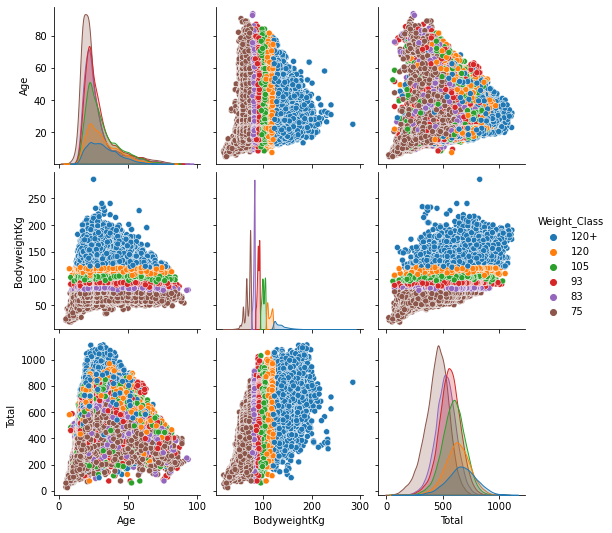

In [18]:
df2 = data[['Age', 'BodyweightKg', 'Total', 'Weight_Class']]
sns.pairplot(df2.dropna(), hue='Weight_Class', hue_order=["120+", "120", "105", "93", "83", "75"])
;

Finding the mean total for each year and weight class:

In [19]:
avg_total = data.groupby(['Year', 'Weight_Class'])['Total'].mean().reset_index()
avg_total = pd.DataFrame(avg_total)

Plotting data:

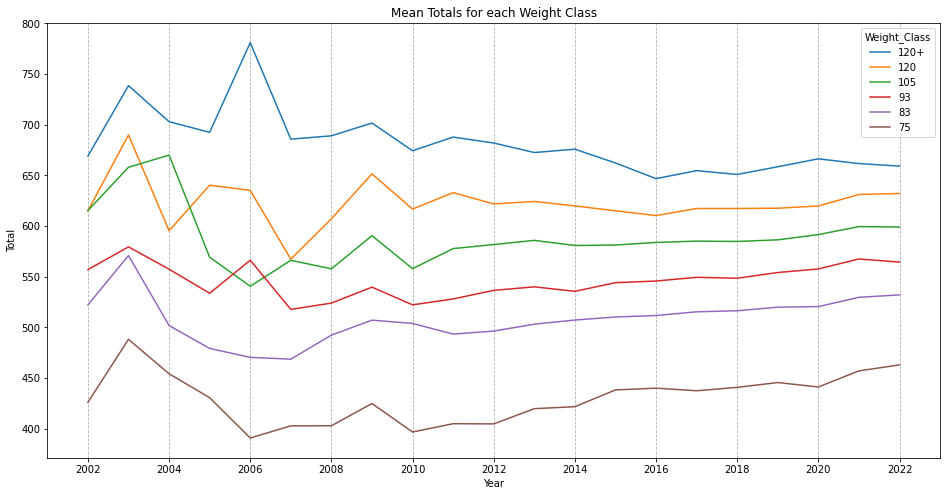

In [20]:
plt.figure(figsize=(16,8)) 
sns.lineplot(x="Year", y="Total", hue="Weight_Class", data=avg_total, hue_order=["120+", "120", "105", "93", "83", "75"])
plt.grid(axis='x', linestyle='--')
plt.xticks(np.arange(2002,2023, step=2))
plt.title('Mean Totals for each Weight Class')
plt.show()

There doesn't seem to be a clear trend in the powerlifters total. What if we look at only the best of the best?:

Taking the 100 best totals by each year and weight class:

In [21]:
df = data.sort_values(by=['Year', 'Weight_Class', 'Total'],\
    ascending=[True, True, False]).\
    groupby(['Year', 'Weight_Class']).head(100)

Plotting data:

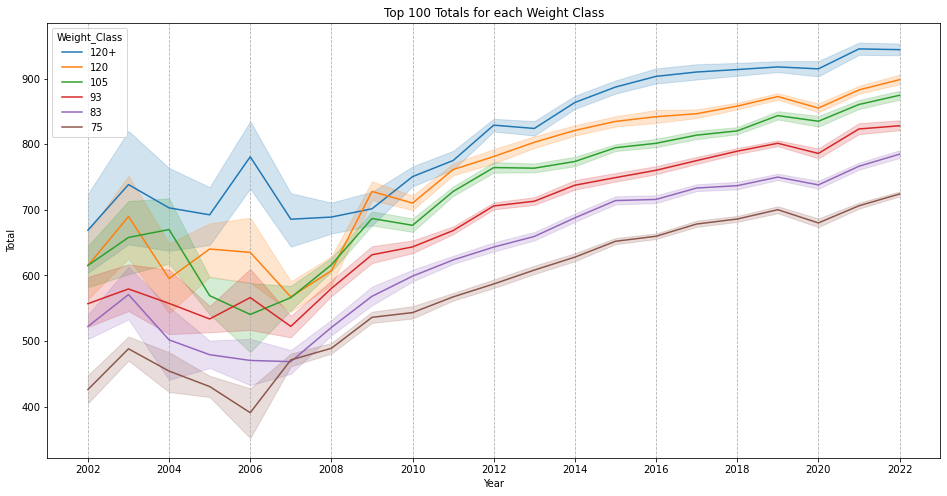

In [22]:
plt.figure(figsize=(16,8)) 
sns.lineplot(x="Year", y="Total", hue="Weight_Class", data=df, hue_order=["120+", "120", "105", "93", "83", "75"])
plt.grid(axis='x', linestyle='--')
plt.xticks(np.arange(2002,2023, step=2))
plt.title('Top 100 Totals for each Weight Class')
plt.show()

This shows that the best powerlifters have gotten stronger over the years. One reason is that the sport has gotten more popular, hence the amount of strength outliers has increased. This might not be the only reason. The top 100 totals in 2022 are higher than the single highest total in 2002. This is the case for all weight classes. Perhaps knowledge of training and nutrition has increased in the past 20 years.